In [1]:
import anndata as ad
import csv
import numpy as np
import pandas as pd
import scanpy as sc
from scipy.sparse import csr_matrix

In [2]:
# OLINK_total = pd.read_csv('../../data/2-updated_OLINK_data_nanToZero.csv')
OLINK_total = pd.read_csv('../../data/2-updated_OLINK_data_withOutlier_nanToZero.csv')
OLINK_total.shape

(41449, 2920)

In [3]:
OLINK_total.head()

,Id,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
0,1000221,0.757567,1.059738,0.815933,0.763303,0.911962,0.988546,0.661753,0.497269,1.032355,...,0.856418,0.818377,0.875872,0.808958,1.000000,0.829799,2.176731,1.150268,0.000000,0.000000
1,1000326,2.583606,2.293678,0.000000,0.000000,0.940864,0.816711,0.941631,1.968941,0.968208,...,1.015154,1.980759,0.743593,2.055729,2.281750,0.000000,2.056565,0.985895,0.734873,0.000000
2,1000662,1.042251,1.417310,0.940098,0.967622,1.076896,1.092434,1.242879,0.807585,1.054544,...,1.123415,1.348269,0.834863,1.147824,1.316108,1.107852,0.452451,0.964498,0.969676,1.186373
3,1000823,1.391736,1.279477,0.871398,1.103463,1.140979,1.412810,0.917597,1.007419,1.104586,...,0.987505,1.353375,0.934770,1.208649,1.212596,0.889118,1.657512,1.032764,0.871443,1.258823
4,1000945,0.910838,0.286904,0.736551,0.884847,0.933054,0.749714,0.000000,0.000000,0.890822,...,0.812096,0.526413,0.859511,0.316076,0.456966,0.722186,1.486522,0.849878,3.465817,1.057866


### Get the sub dataset

In [4]:
# small_df = OLINK_total.sample(frac=0.2, random_state=66)
small_df = OLINK_total.sample(frac=1, random_state=19)
small_df.shape

(41449, 2920)

In [5]:
small_df

,Id,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
8260,2009712,0.934460,0.703704,1.082956,1.119741,0.960943,1.162591,0.000000,0.000000,1.074426,...,0.855388,0.491582,0.881185,0.844061,0.508986,0.807971,1.000000,0.780414,0.000000,0.000000
38640,5676465,1.142620,1.343537,0.923966,1.011546,0.950866,1.309506,0.918915,0.851905,1.139723,...,1.106888,1.159771,0.516690,1.201232,1.276480,0.967035,1.068921,1.310043,0.940433,0.979399
8225,2006275,0.967524,0.993614,0.877534,0.925859,0.993714,0.987405,1.414059,1.425613,1.179099,...,0.987653,0.746154,0.000000,0.911821,0.710251,1.052315,1.248315,0.840920,0.939188,1.033531
9098,2109091,1.418249,1.592974,1.090629,0.938040,1.055607,0.959437,0.633439,0.596825,1.055477,...,1.092805,1.262785,1.201656,1.467683,1.366560,1.094346,1.019834,0.945471,0.915269,1.317395
17371,3092771,1.238264,1.086497,0.902068,0.926712,1.046940,1.249821,1.373304,1.102127,1.092434,...,1.063019,1.073691,1.173914,0.946770,0.900534,0.859309,1.179993,0.998001,2.147377,0.988099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33811,5083037,0.629327,1.135686,1.890329,1.100632,1.025827,0.821563,1.277596,0.272783,0.938806,...,1.339451,1.121577,1.649190,0.950721,0.975020,1.120983,1.459651,0.942446,0.731407,0.997602
21416,3575585,0.522390,0.918256,1.048179,1.041840,1.030618,1.079001,0.950721,0.668475,1.008676,...,1.020367,1.185028,1.635868,1.035834,1.192381,1.451391,2.348549,0.964790,1.242706,1.122766
34146,5126243,0.828051,1.394956,1.072222,0.678659,0.955726,0.767420,1.613838,0.000000,1.008173,...,0.852686,1.252720,0.648776,1.065001,1.477021,1.106138,1.721885,0.925669,0.825935,1.079739
17141,3066488,1.437664,0.839375,1.020189,0.732242,1.257717,1.267925,1.034605,0.957811,1.107745,...,1.028730,0.792728,1.059868,1.031742,1.122604,1.365275,1.001451,1.103035,1.194238,0.699122


In [6]:
OLINK = small_df
# OLINK.to_csv("../data/3-OLINK_data_sub.csv", index = False)

### Process the sub dataset

In [7]:
# OLINK = pd.read_csv('../data/3-OLINK_data_sub.csv')

In [8]:
OLINK.head()

,Id,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
8260,2009712,0.934460,0.703704,1.082956,1.119741,0.960943,1.162591,0.000000,0.000000,1.074426,...,0.855388,0.491582,0.881185,0.844061,0.508986,0.807971,1.000000,0.780414,0.000000,0.000000
38640,5676465,1.142620,1.343537,0.923966,1.011546,0.950866,1.309506,0.918915,0.851905,1.139723,...,1.106888,1.159771,0.516690,1.201232,1.276480,0.967035,1.068921,1.310043,0.940433,0.979399
8225,2006275,0.967524,0.993614,0.877534,0.925859,0.993714,0.987405,1.414059,1.425613,1.179099,...,0.987653,0.746154,0.000000,0.911821,0.710251,1.052315,1.248315,0.840920,0.939188,1.033531
9098,2109091,1.418249,1.592974,1.090629,0.938040,1.055607,0.959437,0.633439,0.596825,1.055477,...,1.092805,1.262785,1.201656,1.467683,1.366560,1.094346,1.019834,0.945471,0.915269,1.317395
17371,3092771,1.238264,1.086497,0.902068,0.926712,1.046940,1.249821,1.373304,1.102127,1.092434,...,1.063019,1.073691,1.173914,0.946770,0.900534,0.859309,1.179993,0.998001,2.147377,0.988099


In [9]:
OLINK=OLINK.set_index('Id')
# OLINK.columns=([a[2:] for a in OLINK.columns])
OLINK.index.names = ['Id']
OLINK.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
2009712,0.934460,0.703704,1.082956,1.119741,0.960943,1.162591,0.000000,0.000000,1.074426,1.210125,...,0.855388,0.491582,0.881185,0.844061,0.508986,0.807971,1.000000,0.780414,0.000000,0.000000
5676465,1.142620,1.343537,0.923966,1.011546,0.950866,1.309506,0.918915,0.851905,1.139723,1.122766,...,1.106888,1.159771,0.516690,1.201232,1.276480,0.967035,1.068921,1.310043,0.940433,0.979399
2006275,0.967524,0.993614,0.877534,0.925859,0.993714,0.987405,1.414059,1.425613,1.179099,0.772631,...,0.987653,0.746154,0.000000,0.911821,0.710251,1.052315,1.248315,0.840920,0.939188,1.033531
2109091,1.418249,1.592974,1.090629,0.938040,1.055607,0.959437,0.633439,0.596825,1.055477,1.483694,...,1.092805,1.262785,1.201656,1.467683,1.366560,1.094346,1.019834,0.945471,0.915269,1.317395
3092771,1.238264,1.086497,0.902068,0.926712,1.046940,1.249821,1.373304,1.102127,1.092434,1.098072,...,1.063019,1.073691,1.173914,0.946770,0.900534,0.859309,1.179993,0.998001,2.147377,0.988099


In [10]:
range_per_column = OLINK.max() - OLINK.min()
print(range_per_column)

# 获取数据范围的最小值和最大值
min_range = range_per_column.min()
max_range = range_per_column.max()

print(min_range, max_range)
print(range_per_column.idxmin(), range_per_column.idxmax())

EIF4EBP1    5.926911
EIF4G1      3.575037
EIF5A       6.194929
ENAH        4.869516
ENG         2.512314
              ...   
CHGB        3.665065
CHGA        5.863298
CHRM1       5.629540
KLK1        5.387288
WFDC2       3.984639
Length: 2919, dtype: float64
1.5890987931479506 13.443629496580613
PON1 DLL4


In [11]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# means = OLINK.mean()

# plt.figure(figsize=(6, 3))
# sns.scatterplot(x=means.index, y=means.values)

In [12]:
# std_devs = OLINK.std()

# plt.figure(figsize=(6, 3))
# sns.scatterplot(x=std_devs.index, y=std_devs.values)

### Split to train and test dataset

In [13]:
from sklearn.model_selection import train_test_split

# X_train, X_test = train_test_split(OLINK, test_size=0.3, random_state=66)
X_train, X_test = train_test_split(OLINK, test_size=0.1, random_state=19)

In [14]:
X_train.shape

(37304, 2919)

In [15]:
X_test.shape

(4145, 2919)

In [16]:
X_train.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
5736075,1.722652,0.687523,1.086867,1.162093,0.934937,0.894051,0.951397,1.419720,1.029342,1.230445,...,0.996903,0.705017,1.095277,1.051953,0.984583,0.821259,0.746073,1.152660,0.468600,1.025674
5888064,0.824258,0.531077,0.000000,0.000000,1.055192,0.936894,1.239763,1.193844,0.930937,1.136067,...,0.991873,0.699698,0.000000,0.651951,0.386045,0.709551,1.006917,0.880683,1.062211,1.543992
1219875,0.521843,0.382026,0.790617,1.305573,1.011193,0.958126,0.971536,1.364602,0.983298,0.748459,...,0.893982,0.660356,0.949612,0.826001,0.717433,1.385432,1.073271,1.065315,0.513402,1.238092
3443892,0.842998,0.541727,1.009934,0.496657,0.872940,1.535202,1.000000,2.310579,0.804503,0.836754,...,0.000000,0.429902,1.397902,0.871715,0.679316,1.036500,0.867279,1.385432,0.620783,0.704979
2574139,0.602368,0.000000,0.917926,1.066098,0.910276,1.056204,1.304739,0.000000,0.983792,0.632551,...,1.000075,0.859982,0.831682,0.734713,0.588404,1.035527,0.774582,1.053921,0.799727,0.794886


In [17]:
X_test.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
4292036,1.881503,1.334467,1.234351,1.166136,1.032840,1.097593,0.698969,1.362157,0.815890,1.777389,...,1.181502,1.320391,1.645208,1.004657,0.746396,1.151340,3.273487,1.050090,1.208904,2.416844
3215419,0.958077,1.448158,0.940720,1.038090,0.957398,0.851660,1.531536,1.233029,0.941822,0.873531,...,0.904557,1.022244,0.877511,1.245190,0.814207,1.028374,0.805230,0.799620,0.827571,0.877443
4792181,0.849522,0.927138,0.970606,1.336036,1.028093,0.927944,1.102875,0.000000,1.180049,1.089781,...,1.505110,0.806814,1.011420,0.900534,0.804760,0.896918,1.258299,1.043383,0.757710,1.362218
5495137,0.749025,0.318188,0.875758,0.795522,0.943310,1.149087,0.682005,1.699730,1.055685,0.934889,...,0.893151,0.684495,0.865022,0.514511,0.413904,1.141963,0.922500,1.015836,3.471229,0.873213
2360164,1.019632,1.399423,1.042045,1.177648,0.953814,1.099192,0.919198,1.026132,1.128671,1.499998,...,1.104078,1.180552,5.186569,1.262086,1.202080,0.918303,0.000000,1.007620,1.121955,1.066203


In [27]:
X_train1, X_train2 = train_test_split(X_train, test_size=0.5, random_state=19)

In [28]:
X_train1.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
1746734,0.760963,0.179363,0.773046,0.644892,1.041171,1.053455,0.887417,0.876578,0.946866,0.491365,...,0.922217,0.819871,0.757792,0.623305,0.436660,0.882511,0.930651,0.755934,0.782840,0.838273
5520940,1.155799,0.594424,1.043229,0.979054,1.070335,1.281477,0.811708,1.753391,0.923776,0.973204,...,0.918939,0.967231,0.990482,0.757853,0.933602,0.785356,0.647527,0.802198,0.408449,0.828794
1593358,1.296601,1.617476,1.006314,1.266814,0.945856,1.109783,0.863175,0.556349,1.071855,1.542974,...,0.980928,0.887463,1.050737,1.484079,1.247822,0.948551,0.956332,0.948937,2.971468,0.000000
5688129,0.960409,1.603958,0.000000,0.000000,0.822432,0.802923,0.997053,0.543043,1.086973,1.334648,...,1.123442,1.344659,0.957277,1.539856,1.581565,1.053092,0.803222,1.014396,0.580940,0.740116
3489761,1.117960,1.521221,0.841185,0.981717,0.962452,1.289912,0.949226,0.665144,0.967671,1.021102,...,1.032943,1.225688,0.787710,1.422633,1.254520,1.339421,0.985573,0.943070,0.000000,0.000000


In [29]:
X_train2.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
2600857,0.916985,0.974136,0.987455,1.147056,0.950577,1.004056,0.959340,0.000000,1.046836,0.878856,...,1.029113,0.940792,0.950697,0.894051,0.730095,1.142674,1.475484,0.878514,0.595370,0.848854
5237874,0.686045,0.257493,0.922217,0.824345,0.896316,0.864481,0.800025,0.696342,0.970165,0.802155,...,0.955411,0.898169,0.763118,0.523911,0.317634,0.966742,1.159992,1.129757,1.203267,0.937467
5621730,1.155082,1.449996,1.383889,1.508285,1.127857,0.996853,1.214900,0.582068,0.988595,1.166524,...,1.073560,1.486586,0.000000,1.335795,1.627672,1.483501,1.292277,0.988695,0.896085,0.976593
2758211,1.023895,0.520055,1.963509,0.913790,1.002102,1.052367,1.375331,1.548464,0.801430,1.252198,...,0.983520,0.904022,1.381916,0.673795,1.063540,0.853444,0.972713,0.990680,0.835808,1.026642
2971150,0.836160,1.030924,1.192324,1.268042,0.843795,1.009984,0.780372,0.853757,1.227693,0.999900,...,0.850033,1.058672,1.137348,0.811063,1.200723,1.094400,0.998701,1.137621,0.856798,1.203154


In [18]:
# X_train.to_csv("../data/3-OLINK_data_sub_train.csv")
# X_test.to_csv("../data/3-OLINK_data_sub_test.csv")

### Normalization

对数据进行 Min-Max 标准化处理

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
X_train1_norm = scaler.fit_transform(X_train1)
X_train2_norm = scaler.fit_transform(X_train2)

X_test_norm = scaler.transform(X_test)

In [31]:
X_train1_norm.shape

(18652, 2919)

In [32]:
X_train2_norm.shape

(18652, 2919)

In [33]:
X_test_norm.shape

(4145, 2919)

In [34]:
X_train1_norm_df = pd.DataFrame(X_train1_norm, columns=X_train1.columns, index=X_train1.index)
X_train2_norm_df = pd.DataFrame(X_train2_norm, columns=X_train2.columns, index=X_train2.index)

X_test_norm_df = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)

In [99]:
# X_train_norm_df.to_csv("../data/3-OLINK_data_sub_train_norm.csv")
# X_test_norm_df.to_csv("../data/3-OLINK_data_sub_test_norm.csv")

In [35]:
X_train1_norm_df.head()
# print(X_train_norm_df.columns.shape)

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
1746734,0.128391,0.050171,0.156580,0.149412,0.484420,0.390427,0.298331,0.211896,0.533068,0.080353,...,0.183582,0.145511,0.075566,0.234906,0.116007,0.247373,0.158725,0.134280,0.145312,0.223202
5520940,0.195009,0.166271,0.211305,0.226832,0.497989,0.474935,0.272879,0.423849,0.520069,0.159149,...,0.182930,0.171664,0.098770,0.285613,0.248028,0.220140,0.110437,0.142498,0.075817,0.220678
1593358,0.218765,0.452436,0.203828,0.293502,0.440073,0.411303,0.290181,0.134487,0.603435,0.252323,...,0.195270,0.157507,0.104778,0.559307,0.331506,0.265885,0.163105,0.168564,0.551570,0.000000
5688129,0.162042,0.448655,0.000000,0.000000,0.382649,0.297576,0.335188,0.131270,0.611946,0.218256,...,0.223639,0.238650,0.095459,0.580328,0.420171,0.295188,0.136991,0.180192,0.107835,0.197066
3489761,0.188624,0.425512,0.170381,0.227449,0.447795,0.478061,0.319110,0.160786,0.544781,0.166981,...,0.205624,0.217535,0.078550,0.536150,0.333286,0.375448,0.168092,0.167522,0.000000,0.000000


In [36]:
X_train2_norm_df.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
2600857,0.218344,0.280191,0.216898,0.259520,0.378367,0.393756,0.408972,0.000000,0.651785,0.139247,...,0.187065,0.145508,0.113958,0.363668,0.180709,0.311775,0.267170,0.191155,0.118475,0.213032
5237874,0.163355,0.074063,0.202568,0.186507,0.356769,0.339020,0.341055,0.162584,0.604048,0.127095,...,0.173668,0.138916,0.091473,0.213108,0.078619,0.263772,0.210044,0.245822,0.239442,0.235270
5621730,0.275037,0.417062,0.303976,0.341247,0.448932,0.390932,0.517918,0.135903,0.615523,0.184826,...,0.195145,0.229924,0.000000,0.543353,0.402872,0.404768,0.233997,0.215129,0.178315,0.245089
2758211,0.243800,0.149583,0.431292,0.206744,0.398876,0.412702,0.586311,0.361539,0.498990,0.198400,...,0.178778,0.139821,0.165648,0.274075,0.263241,0.232859,0.176132,0.215561,0.166320,0.257650
2971150,0.199099,0.296525,0.261898,0.286892,0.335864,0.396081,0.332677,0.199337,0.764391,0.158426,...,0.154513,0.163740,0.136332,0.329911,0.297196,0.298603,0.180838,0.247533,0.170497,0.301948


In [37]:
X_test_norm_df.head()
# print(X_test_norm_df.columns.shape)

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
4292036,0.448006,0.383833,0.271130,0.263836,0.411111,0.430438,0.297974,0.318039,0.507993,0.281612,...,0.214766,0.204219,0.197208,0.408658,0.184744,0.314139,0.592741,0.228488,0.240564,0.606540
3215419,0.228128,0.416534,0.206633,0.234866,0.381082,0.333992,0.652902,0.287890,0.586401,0.138403,...,0.164424,0.158106,0.105186,0.506498,0.201528,0.280588,0.145806,0.173988,0.164681,0.220206
4792181,0.202280,0.266673,0.213197,0.302276,0.409222,0.363908,0.470161,0.000000,0.734727,0.172666,...,0.273589,0.124786,0.121237,0.366305,0.199190,0.244721,0.227844,0.227028,0.150779,0.341867
5495137,0.178351,0.091520,0.192363,0.179986,0.375474,0.450633,0.290743,0.396857,0.657295,0.148125,...,0.162351,0.105868,0.103689,0.209284,0.102447,0.311581,0.167040,0.221034,0.690751,0.219145
2360164,0.242785,0.402516,0.228889,0.266441,0.379656,0.431065,0.391859,0.239584,0.702738,0.237662,...,0.200692,0.182591,0.621704,0.513371,0.297532,0.250556,0.000000,0.219247,0.223262,0.267578


In [38]:
# X_train_norm_df.columns- X_test_norm_df.columns

In [39]:
# X_train_norm_df['Row_Sum'] = X_train_norm_df.sum(axis=1)
# X_train_norm_df['Row_Sum'].mean()

### Construct the adata

In [41]:
def constructAdata(df):
    
    df.columns = df.columns.astype(str)
    print(df.columns.shape)
    df.index = df.index.astype(str)
    # print(df.head())

    Odata = ad.AnnData(df)
    print(Odata)

    return Odata
    

In [42]:
Odata_train1 = constructAdata(X_train1_norm_df)
Odata_train2 = constructAdata(X_train2_norm_df)

Odata_test = constructAdata(X_test_norm_df)

(2919,)
AnnData object with n_obs × n_vars = 18652 × 2919
(2919,)
AnnData object with n_obs × n_vars = 18652 × 2919
(2919,)
AnnData object with n_obs × n_vars = 4145 × 2919


In [43]:
# OLINK_b = X_train_norm_df

In [44]:
# OLINK_b.columns = OLINK_b.columns.astype(str)
# OLINK_b.index = OLINK_b.index.astype(str)
# OLINK_b.head()

In [45]:
# Odata = ad.AnnData(OLINK_b)
# Odata

In [46]:
# print(Odata.var_names)

### 基因匹配

In [47]:
def matchGenes(a):
    Odata = a.copy()
    with open('/data/mr423/project/data/keys_blood.txt', 'r') as file:
        genes_from_file = [line.strip() for line in file]
        
        not_in_genes=([ i for i in Odata.var_names if i not in genes_from_file ]) # 找出不在基因列表中的基因
        print("not on the genes lsts: \n")
        print(not_in_genes)
        print("\n")

        in_substr=[ i for i in not_in_genes if any([ i in j for j in genes_from_file])]
        print("match sub of the genes list: \n")
        print(in_substr)
        print("\n")

        for i in in_substr:
            print(f"process: {i}")
            out = list(np.array(genes_from_file)[[i in j for j in genes_from_file]])
            print(f"match to: {out}")
            if out:
                Odata.var.rename(index={i: out[0]}, inplace=True)

        complement = list(set(not_in_genes) - set(in_substr))
        print("\n complement: \n", complement, "\n")

        print("********************************************************************** \n")

        for k in complement:
            print(f"process: {k}")
            if "_" in k:
                print("***********************************")
                parts = k.split("_")
                substr=[ i for i in parts if any([ i in j for j in genes_from_file])]
                print(" match to the genes list:")
                print(substr)
                
                for i in substr:
                    print(f"for: {i}")
                    # 首先查找完全匹配的基因
                    exact_match = [j for j in genes_from_file if i == j]
                    if exact_match:
                        out = exact_match
                    else:
                        # 如果没有完全匹配的，再查找部分匹配的基因
                        out = [j for j in genes_from_file if i in j]
                    
                    print(f"match to: {out}")
                    if out:
                        Odata.var.rename(index={i: out[0]}, inplace=True)
                        print(f"remove: {k}, use {out[0]} represents {k}")
                        complement.remove(k)
                        break
                    print("************************")
                print("***********************************")
        
        print("\n complement: \n", complement, "\n")
                
                


        


        # in_substr=[ i for i in genes_from_file if any([ i in j for j in complement])]
        # for i in in_substr:
        #     print(f"process: {i}")
        #     out = list(np.array(complement)[[i in j for j in complement]])
        #     print(f"match to: {out}")

        

        return Odata


In [48]:
Odata_train1_matched = matchGenes(Odata_train1)

not on the genes lsts: 

['CKMT1A_CKMT1B', 'DEFA1_DEFA1B', 'PNLIPRP2', 'IL3RA', 'NTproBNP', 'MICB_MICA', 'SIGLEC5', 'SARG', 'SPACA5_SPACA5B', 'PALM2', 'HCG22', 'IL12A_IL12B', 'GPR15L', 'FHIP2A', 'GATD3', 'FUT3_FUT5', 'MENT', 'KIR2DL2', 'KIR2DS4', 'LEG1', 'LILRA3', 'LGALS7_LGALS7B', 'BTNL10', 'BOLA2_BOLA2B', 'BAP18', 'CD99', 'CERT', 'WARS', 'AMY1A_AMY1B_AMY1C', 'AKR7L', 'ANP32C', 'DEFB103A_DEFB103B', 'DEFB4A_DEFB4B', 'DEFB104A_DEFB104B', 'CTAG1A_CTAG1B', 'CSF2RA', 'CGB3_CGB5_CGB8', 'EBI3_IL27']


match sub of the genes list: 

['IL3RA', 'SIGLEC5', 'PALM2', 'GATD3', 'CD99', 'CERT', 'WARS', 'CSF2RA']


process: IL3RA
match to: ['IL3RA_ENSG00000185291']
process: SIGLEC5
match to: ['SIGLEC5_ENSG00000268500', 'SIGLEC5_ENSG00000105501']
process: PALM2
match to: ['PALM2AKAP2']
process: GATD3
match to: ['GATD3A', 'GATD3B']
process: CD99
match to: ['CD99_ENSG00000002586', 'CD99L2']
process: CERT
match to: ['CERT1']
process: WARS
match to: ['WARS2-IT1', 'WARS2', 'WARS1', 'WARS2-AS1']
process: CSF

In [49]:
Odata_train2_matched = matchGenes(Odata_train2)

not on the genes lsts: 

['CKMT1A_CKMT1B', 'DEFA1_DEFA1B', 'PNLIPRP2', 'IL3RA', 'NTproBNP', 'MICB_MICA', 'SIGLEC5', 'SARG', 'SPACA5_SPACA5B', 'PALM2', 'HCG22', 'IL12A_IL12B', 'GPR15L', 'FHIP2A', 'GATD3', 'FUT3_FUT5', 'MENT', 'KIR2DL2', 'KIR2DS4', 'LEG1', 'LILRA3', 'LGALS7_LGALS7B', 'BTNL10', 'BOLA2_BOLA2B', 'BAP18', 'CD99', 'CERT', 'WARS', 'AMY1A_AMY1B_AMY1C', 'AKR7L', 'ANP32C', 'DEFB103A_DEFB103B', 'DEFB4A_DEFB4B', 'DEFB104A_DEFB104B', 'CTAG1A_CTAG1B', 'CSF2RA', 'CGB3_CGB5_CGB8', 'EBI3_IL27']


match sub of the genes list: 

['IL3RA', 'SIGLEC5', 'PALM2', 'GATD3', 'CD99', 'CERT', 'WARS', 'CSF2RA']


process: IL3RA
match to: ['IL3RA_ENSG00000185291']
process: SIGLEC5
match to: ['SIGLEC5_ENSG00000268500', 'SIGLEC5_ENSG00000105501']
process: PALM2
match to: ['PALM2AKAP2']
process: GATD3
match to: ['GATD3A', 'GATD3B']
process: CD99
match to: ['CD99_ENSG00000002586', 'CD99L2']
process: CERT
match to: ['CERT1']
process: WARS
match to: ['WARS2-IT1', 'WARS2', 'WARS1', 'WARS2-AS1']
process: CSF

In [50]:
Odata_test_matched = matchGenes(Odata_test)

not on the genes lsts: 

['CKMT1A_CKMT1B', 'DEFA1_DEFA1B', 'PNLIPRP2', 'IL3RA', 'NTproBNP', 'MICB_MICA', 'SIGLEC5', 'SARG', 'SPACA5_SPACA5B', 'PALM2', 'HCG22', 'IL12A_IL12B', 'GPR15L', 'FHIP2A', 'GATD3', 'FUT3_FUT5', 'MENT', 'KIR2DL2', 'KIR2DS4', 'LEG1', 'LILRA3', 'LGALS7_LGALS7B', 'BTNL10', 'BOLA2_BOLA2B', 'BAP18', 'CD99', 'CERT', 'WARS', 'AMY1A_AMY1B_AMY1C', 'AKR7L', 'ANP32C', 'DEFB103A_DEFB103B', 'DEFB4A_DEFB4B', 'DEFB104A_DEFB104B', 'CTAG1A_CTAG1B', 'CSF2RA', 'CGB3_CGB5_CGB8', 'EBI3_IL27']


match sub of the genes list: 

['IL3RA', 'SIGLEC5', 'PALM2', 'GATD3', 'CD99', 'CERT', 'WARS', 'CSF2RA']


process: IL3RA
match to: ['IL3RA_ENSG00000185291']
process: SIGLEC5
match to: ['SIGLEC5_ENSG00000268500', 'SIGLEC5_ENSG00000105501']
process: PALM2
match to: ['PALM2AKAP2']
process: GATD3
match to: ['GATD3A', 'GATD3B']
process: CD99
match to: ['CD99_ENSG00000002586', 'CD99L2']
process: CERT
match to: ['CERT1']
process: WARS
match to: ['WARS2-IT1', 'WARS2', 'WARS1', 'WARS2-AS1']
process: CSF

In [51]:
# with open('/data/mr423/project/gene2idx.txt', newline='') as f:
# # with open('/data/mr423/project/keys.txt', newline='') as f:
#     reader = csv.reader(f)
#     genes = list(reader)

# # print(type(genes))
    
# genes =  [ a.replace("'", "").replace(" ", "") for a in genes[0] ]
# # print(type(genes))
# # print(genes)

# not_in_genes=([ a for a in Odata.var_names if a not in genes ]) # 找出不在基因列表中的基因
# print("not_in_genes \n :",not_in_genes)
# '''
# 从 not_in_genes 列表中找出那些作为子字符串存在于 genes 列表中的基因名称，并将它们存储在 notin_substr 列表中。
# 样可以帮助我们识别那些虽然不完全匹配但在某种程度上与已有基因相关的基因名称
# '''
# notin_substr=[ a for a in not_in_genes if any([ a in b for b in genes])]
# notin_substr

In [52]:
# '''
# 将 notin_substr 列表中的基因子串替换为它们在 genes 列表中匹配的完整基因名称，并在 Odata.var 数据框中重命名这些基因
# '''
# for a in notin_substr:
#     print(a)
#     out=(list(np.array(genes)[[ a in b for b in genes]]))
#     Odata.var.rename(index={a: out[0]}, inplace=True)

In [53]:
gene_name = Odata_train1_matched.var_names.astype("category")

Odata_train1_matched.var["gene_name"] = gene_name
Odata_train2_matched.var["gene_name"] = gene_name

Odata_test_matched.var["gene_name"] = gene_name

## Sample data format

In [141]:
data_dir = "../tutorials/data/Multiple_Sclerosis_dataset/ms/c_data.h5ad"
adata = sc.read(data_dir)

In [16]:
Odata.obs = pd.DataFrame(index=Odata.obs.index, columns=adata.obs.columns)
Odata.obs[adata.obs.columns]=np.nan
Odata.shape

(2000, 2917)

### initial data

In [17]:
Odata.obs

,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[developmental stage],Sample Characteristic Ontology Term[developmental stage],...,Factor Value[disease],Factor Value Ontology Term[disease],Factor Value[sampling site],Factor Value Ontology Term[sampling site],Factor Value[inferred cell type - ontology labels],Factor Value Ontology Term[inferred cell type - ontology labels],Factor Value[inferred cell type - authors labels],Factor Value Ontology Term[inferred cell type - authors labels],str_batch,celltype
Id,,,,,,,,,,,,,,,,,,,,,
1000221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1237469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1237481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
i = 0
for col in Odata.obs.columns:
    vvs = np.unique(Odata.obs[col].dropna())
    if len(vvs) == 0:
        i+=1
        print(f"列 {col} 全部都是 NA")
print(i)

列 Sample Characteristic[organism] 全部都是 NA
列 Sample Characteristic Ontology Term[organism] 全部都是 NA
列 Sample Characteristic[individual] 全部都是 NA
列 Sample Characteristic Ontology Term[individual] 全部都是 NA
列 Sample Characteristic[sex] 全部都是 NA
列 Sample Characteristic Ontology Term[sex] 全部都是 NA
列 Sample Characteristic[age] 全部都是 NA
列 Sample Characteristic Ontology Term[age] 全部都是 NA
列 Sample Characteristic[developmental stage] 全部都是 NA
列 Sample Characteristic Ontology Term[developmental stage] 全部都是 NA
列 Sample Characteristic[organism part] 全部都是 NA
列 Sample Characteristic Ontology Term[organism part] 全部都是 NA
列 Sample Characteristic[sampling site] 全部都是 NA
列 Sample Characteristic Ontology Term[sampling site] 全部都是 NA
列 Sample Characteristic[disease] 全部都是 NA
列 Sample Characteristic Ontology Term[disease] 全部都是 NA
列 Sample Characteristic[organism status] 全部都是 NA
列 Sample Characteristic Ontology Term[organism status] 全部都是 NA
列 Sample Characteristic[cause of death] 全部都是 NA
列 Sample Characteristic Ontology

In [19]:
Odata.obs.dtypes

Sample Characteristic[organism]                                     float64
Sample Characteristic Ontology Term[organism]                       float64
Sample Characteristic[individual]                                   float64
Sample Characteristic Ontology Term[individual]                     float64
Sample Characteristic[sex]                                          float64
Sample Characteristic Ontology Term[sex]                            float64
Sample Characteristic[age]                                          float64
Sample Characteristic Ontology Term[age]                            float64
Sample Characteristic[developmental stage]                          float64
Sample Characteristic Ontology Term[developmental stage]            float64
Sample Characteristic[organism part]                                float64
Sample Characteristic Ontology Term[organism part]                  float64
Sample Characteristic[sampling site]                                float64
Sample Chara

### set some data

In [20]:
# # 遍历 adata.obs 的每一列并处理
# for a in range(len(adata.obs.columns)):
#     vvs = np.unique(adata.obs.iloc[:, a].dropna())
#     if len(vvs) == 1:
#         # 将 Odata.obs 对应列显式转换为 adata.obs 对应列的类型
#         if adata.obs.iloc[:, a].dtype == object or isinstance(adata.obs.iloc[0, a], str):
            
#             Odata.obs.iloc[:, a] = Odata.obs.iloc[:, a].astype(object)
#         else:
#             Odata.obs.iloc[:, a] = Odata.obs.iloc[:, a].astype(adata.obs.iloc[:, a].dtype)
        
#         # 赋值为 adata.obs 中该列的第一个值
#         Odata.obs.iloc[:, a] = adata.obs.iloc[0, a]

In [21]:
i = 0
for col in Odata.obs.columns:
    vvs = np.unique(Odata.obs[col].dropna())
    if len(vvs) == 0:
        i+=1
        # print(f"列 {col} 全部都是 NA")
        print(f"Odata.obs.loc[:,'{col}']")
        # print(f"'{col}',")
print(i)

Odata.obs.loc[:,'Sample Characteristic[organism]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism]']
Odata.obs.loc[:,'Sample Characteristic[individual]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[individual]']
Odata.obs.loc[:,'Sample Characteristic[sex]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[sex]']
Odata.obs.loc[:,'Sample Characteristic[age]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[age]']
Odata.obs.loc[:,'Sample Characteristic[developmental stage]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[developmental stage]']
Odata.obs.loc[:,'Sample Characteristic[organism part]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism part]']
Odata.obs.loc[:,'Sample Characteristic[sampling site]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[sampling site]']
Odata.obs.loc[:,'Sample Characteristic[disease]']
Odata.obs.loc[:,'Sample Characteristic Ontology Term[disease]']
Odata.obs.loc[:,'Sample Characteristic[organism 

### set fake data

In [29]:
columns_to_convert = [
    'Sample Characteristic[organism]',
    'Sample Characteristic Ontology Term[organism]',
    'Sample Characteristic[individual]',
    'Sample Characteristic[sex]',
    'Sample Characteristic Ontology Term[sex]',
    'Sample Characteristic[age]',
    'Sample Characteristic[developmental stage]',
    'Sample Characteristic Ontology Term[developmental stage]',
    'Sample Characteristic[organism part]',
    'Sample Characteristic Ontology Term[organism part]',
    'Sample Characteristic[sampling site]',
    'Sample Characteristic Ontology Term[sampling site]',
    'Sample Characteristic[disease]',
    'Sample Characteristic Ontology Term[disease]',
    'Sample Characteristic[organism status]',
    'Sample Characteristic Ontology Term[organism status]',
    'Factor Value[disease]',
    'Factor Value Ontology Term[disease]',
    'Factor Value[sampling site]',
    'Factor Value Ontology Term[sampling site]',
    'Factor Value[inferred cell type - ontology labels]',
    'Factor Value Ontology Term[inferred cell type - ontology labels]',
    'Factor Value[inferred cell type - authors labels]',
    'Factor Value Ontology Term[inferred cell type - authors labels]',
    'str_batch',
    'celltype',
]

for column in columns_to_convert:
    Odata.obs[column] = Odata.obs[column].astype(str)

# Odata.obs.loc[:,'Sample Characteristic[organism]'] = 'Homo sapiens'
# Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism]'] = 'http://purl.obolibrary.org/obo/NCBITaxon_9606'
# Odata.obs.loc[:,'Sample Characteristic[individual]'] = Odata.obs.index
# Odata.obs.loc[:,'Sample Characteristic[sex]']='female'
# Odata.obs.loc[:,'Sample Characteristic Ontology Term[sex]']='http://purl.obolibrary.org/obo/PATO_0000383'
# Odata.obs.loc[:,'Sample Characteristic[age]']='60 year'
# Odata.obs.loc[:,'Sample Characteristic[developmental stage]'] = 'human adult stage'
# Odata.obs.loc[:,'Sample Characteristic[sampling site]']='blood plasma'
# Odata.obs.loc[:,'Sample Characteristic Ontology Term[sampling site]']='http://purl.obolibrary.org/obo/UBERON:0001969'
# Odata.obs.loc[:,'Factor Value[sampling site]']='http://purl.obolibrary.org/obo/UBERON:0001969'
# Odata.obs.loc[:,'Factor Value[inferred cell type - authors labels]'] = 'fake cell'
# Odata.obs.loc[:,'str_batch'] = '3'



Odata.obs.loc[:,'Sample Characteristic[organism]'] = 'Homo sapiens'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism]'] = 'http://purl.obolibrary.org/obo/NCBITaxon_9606'
Odata.obs.loc[:,'Sample Characteristic[individual]']= Odata.obs.index
Odata.obs.loc[:,'Sample Characteristic[sex]']= 'female'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[sex]'] ='http://purl.obolibrary.org/obo/PATO_0000383'
Odata.obs.loc[:,'Sample Characteristic[age]'] = '60 year'
Odata.obs.loc[:,'Sample Characteristic[developmental stage]'] ='human adult stage'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[developmental stage]'] ='http://purl.obolibrary.org/obo/HsapDv_0000087'
Odata.obs.loc[:,'Sample Characteristic[organism part]'] = 'blood'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism part]'] ='http://purl.obolibrary.org/obo/UBERON_0000955'
Odata.obs.loc[:,'Sample Characteristic[sampling site]'] ='blood plasma'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[sampling site]'] = 'http://purl.obolibrary.org/obo/UBERON:0001969'
Odata.obs.loc[:,'Sample Characteristic[disease]'] = 'normal'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[disease]'] ='http://purl.obolibrary.org/obo/PATO_0000461'
Odata.obs.loc[:,'Sample Characteristic[organism status]'] = 'dead'
Odata.obs.loc[:,'Sample Characteristic Ontology Term[organism status]'] ='http://purl.obolibrary.org/obo/PATO_0001422'
Odata.obs.loc[:,'Factor Value[disease]'] ='normal'
Odata.obs.loc[:,'Factor Value Ontology Term[disease]'] = 'http://purl.obolibrary.org/obo/PATO_0000461'
Odata.obs.loc[:,'Factor Value[sampling site]'] = 'blood plasma'
Odata.obs.loc[:,'Factor Value Ontology Term[sampling site]']
Odata.obs.loc[:,'Factor Value[inferred cell type - ontology labels]']
Odata.obs.loc[:,'Factor Value Ontology Term[inferred cell type - ontology labels]']
Odata.obs.loc[:,'Factor Value[inferred cell type - authors labels]']
Odata.obs.loc[:,'Factor Value Ontology Term[inferred cell type - authors labels]']
Odata.obs.loc[:,'str_batch'] ='3'
# Odata.obs.loc[:,'celltype'] = '

In [30]:
Odata.obs

,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[developmental stage],Sample Characteristic Ontology Term[developmental stage],...,Factor Value[disease],Factor Value Ontology Term[disease],Factor Value[sampling site],Factor Value Ontology Term[sampling site],Factor Value[inferred cell type - ontology labels],Factor Value Ontology Term[inferred cell type - ontology labels],Factor Value[inferred cell type - authors labels],Factor Value Ontology Term[inferred cell type - authors labels],str_batch,celltype
Id,,,,,,,,,,,,,,,,,,,,,
1000221,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000221,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000326,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000326,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000662,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000662,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000823,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000823,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000945,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000945,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237356,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237356,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1237469,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237469,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1237481,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237481,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan


In [31]:
Odata.obs.dtypes

Sample Characteristic[organism]                                      object
Sample Characteristic Ontology Term[organism]                        object
Sample Characteristic[individual]                                    object
Sample Characteristic Ontology Term[individual]                     float64
Sample Characteristic[sex]                                           object
Sample Characteristic Ontology Term[sex]                             object
Sample Characteristic[age]                                           object
Sample Characteristic Ontology Term[age]                            float64
Sample Characteristic[developmental stage]                           object
Sample Characteristic Ontology Term[developmental stage]             object
Sample Characteristic[organism part]                                 object
Sample Characteristic Ontology Term[organism part]                   object
Sample Characteristic[sampling site]                                 object
Sample Chara

In [32]:
columns_to_convert = [
    'Sample Characteristic[organism]',
    'Sample Characteristic Ontology Term[organism]',
    'Sample Characteristic[individual]',
    'Sample Characteristic[sex]',
    'Sample Characteristic Ontology Term[sex]',
    'Sample Characteristic[age]',
    'Sample Characteristic[developmental stage]',
    'Sample Characteristic Ontology Term[developmental stage]',
    'Sample Characteristic[organism part]',
    'Sample Characteristic Ontology Term[organism part]',
    'Sample Characteristic[sampling site]',
    'Sample Characteristic Ontology Term[sampling site]',
    'Sample Characteristic[disease]',
    'Sample Characteristic Ontology Term[disease]',
    'Sample Characteristic[organism status]',
    'Sample Characteristic Ontology Term[organism status]',
    'Factor Value[disease]',
    'Factor Value Ontology Term[disease]',
    'Factor Value[sampling site]',
    'Factor Value Ontology Term[sampling site]',
    'Factor Value[inferred cell type - ontology labels]',
    'Factor Value Ontology Term[inferred cell type - ontology labels]',
    'Factor Value[inferred cell type - authors labels]',
    'Factor Value Ontology Term[inferred cell type - authors labels]',
    'str_batch',
    'celltype',
]

for column in columns_to_convert:
    Odata.obs[column] = Odata.obs[column].astype('category')

In [33]:
Odata.obs.dtypes

Sample Characteristic[organism]                                     category
Sample Characteristic Ontology Term[organism]                       category
Sample Characteristic[individual]                                   category
Sample Characteristic Ontology Term[individual]                      float64
Sample Characteristic[sex]                                          category
Sample Characteristic Ontology Term[sex]                            category
Sample Characteristic[age]                                          category
Sample Characteristic Ontology Term[age]                             float64
Sample Characteristic[developmental stage]                          category
Sample Characteristic Ontology Term[developmental stage]            category
Sample Characteristic[organism part]                                category
Sample Characteristic Ontology Term[organism part]                  category
Sample Characteristic[sampling site]                                category

In [34]:
Odata.obs

,Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[age],Sample Characteristic Ontology Term[age],Sample Characteristic[developmental stage],Sample Characteristic Ontology Term[developmental stage],...,Factor Value[disease],Factor Value Ontology Term[disease],Factor Value[sampling site],Factor Value Ontology Term[sampling site],Factor Value[inferred cell type - ontology labels],Factor Value Ontology Term[inferred cell type - ontology labels],Factor Value[inferred cell type - authors labels],Factor Value Ontology Term[inferred cell type - authors labels],str_batch,celltype
Id,,,,,,,,,,,,,,,,,,,,,
1000221,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000221,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000326,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000326,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000662,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000662,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000823,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000823,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1000945,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1000945,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237356,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237356,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1237469,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237469,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan
1237481,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,1237481,NaN,female,http://purl.obolibrary.org/obo/PATO_0000383,60 year,NaN,human adult stage,http://purl.obolibrary.org/obo/HsapDv_0000087,...,normal,http://purl.obolibrary.org/obo/PATO_0000461,blood plasma,nan,nan,nan,nan,nan,3,nan


In [35]:
Odata.var

,gene_name
EIF4EBP1,EIF4EBP1
EIF4G1,EIF4G1
EIF5A,EIF5A
ENAH,ENAH
ENG,ENG
...,...
CHGB,CHGB
CHGA,CHGA
CHRM1,CHRM1
KLK1,KLK1


## Get sex data

In [54]:
OLINK_pheno=pd.read_csv('/shared/eduff/meg_ukb671140.csv')
OLINK_pheno=OLINK_pheno.set_index('eid')
OLINK_pheno.head()

,1558-0.0,1558-1.0,1558-2.0,1558-3.0,20116-0.0,20116-1.0,20116-2.0,20116-3.0,21000-0.0,21000-1.0,...,20003-3.38,20003-3.39,20003-3.40,20003-3.41,20003-3.42,20003-3.43,20003-3.44,20003-3.45,20003-3.46,20003-3.47
eid,,,,,,,,,,,,,,,,,,,,,
1000037,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000221,2.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000326,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000662,5.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000823,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
def getSexFromBioBankData(adata):
    Odata = adata.copy()
    els=[int(i) for i in Odata.obs.index]
    gender_info = OLINK_pheno.loc[els, '31-0.0']
    gender_info = gender_info.map({1: 1, 0: 0})
    # print(gender_info)

    Odata.obs['sex'] = gender_info.values

    return Odata
    

In [56]:
Odata_train1_with_sex = getSexFromBioBankData(Odata_train1_matched)
Odata_train2_with_sex = getSexFromBioBankData(Odata_train2_matched)

Odata_test_with_sex = getSexFromBioBankData(Odata_test_matched)

In [57]:
Odata_train1_with_sex.obs

,sex
Id,
1746734,0
5520940,0
1593358,0
5688129,1
3489761,0
...,...
5474998,0
4505014,1
4663692,0


In [58]:
Odata_train2_with_sex.obs

,sex
Id,
2600857,0
5237874,0
5621730,1
2758211,1
2971150,0
...,...
5000118,0
1637260,1
3594834,0


## Get age data

In [59]:
OLINK_pheno=pd.read_csv('/shared/eduff/meg_ukb671140.csv')
OLINK_pheno=OLINK_pheno.set_index('eid')
OLINK_pheno

,1558-0.0,1558-1.0,1558-2.0,1558-3.0,20116-0.0,20116-1.0,20116-2.0,20116-3.0,21000-0.0,21000-1.0,...,20003-3.38,20003-3.39,20003-3.40,20003-3.41,20003-3.42,20003-3.43,20003-3.44,20003-3.45,20003-3.46,20003-3.47
eid,,,,,,,,,,,,,,,,,,,,,
1000037,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000221,2.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000326,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000662,5.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000823,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023823,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6023922,6.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6024013,2.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
def setDoBDataFromBioBankData(adata):
    Odata = adata.copy()
    
    els=[int(a) for a in Odata.obs.index]
    
    DoB_Year = OLINK_pheno.loc[els, '34-0.0']
    DoB_Month = OLINK_pheno.loc[els, '52-0.0']
    
    Odata.obs['DoB_Year'] = DoB_Year.values
    Odata.obs['DoB_Month'] = DoB_Month.values
    # Odata.obs['DoB_Time'] = DoB_Year.values + DoB_Month.values/12.0
    Odata.obs = Odata.obs.assign(DoB_Day=15)

    Odata.obs['DoB_Year'] = Odata.obs['DoB_Year'].astype(int)
    Odata.obs['DoB_Month'] = Odata.obs['DoB_Month'].astype(int)
    Odata.obs['DoB_Day'] = Odata.obs['DoB_Day'].astype(int)

    Odata.obs['DoB'] = Odata.obs.apply(lambda row: pd.to_datetime(f"{row['DoB_Year']}-{row['DoB_Month']}-{row['DoB_Day']}"), axis=1)
    Odata.obs['DoB'] = pd.to_datetime(Odata.obs['DoB'])

    return Odata  

In [61]:
Odata_train1_with_DoBData = setDoBDataFromBioBankData(Odata_train1_with_sex)
Odata_train2_with_DoBData = setDoBDataFromBioBankData(Odata_train2_with_sex)

Odata_test_with_DoBData = setDoBDataFromBioBankData(Odata_test_with_sex)

In [64]:
Odata_train2_with_DoBData.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB
Id,,,,,
2600857,0,1947,10,15,1947-10-15
5237874,0,1947,11,15,1947-11-15
5621730,1,1961,10,15,1961-10-15
2758211,1,1953,5,15,1953-05-15
2971150,0,1966,11,15,1966-11-15
...,...,...,...,...,...
5000118,0,1955,9,15,1955-09-15
1637260,1,1945,3,15,1945-03-15
3594834,0,1962,6,15,1962-06-15


In [65]:
# from datetime import date
# d0 = date(2008,8,18)
# d1 = date(2009, 9,26)
# delta = d1 - d0
# type(d0)

In [66]:
def setDateofAttendingAssessmentFromBioBankData(adata):
    Odata = adata.copy()
    
    els=[int(a) for a in Odata.obs.index]
    Date_Attend = OLINK_pheno.loc[els, '53-0.0']
    
    Odata.obs['Date_Attend'] = Date_Attend.values
    Odata.obs['Date_Attend'] = pd.to_datetime(Odata.obs['Date_Attend'])


    # Odata.obs['Attend_Year'] = Odata.obs['Date_Attend'].dt.year
    # Odata.obs['Attend_Month'] = Odata.obs['Date_Attend'].dt.month

    # Odata.obs['Attend_Time'] = Odata.obs['Attend_Year'].values + Odata.obs['Attend_Month'].values/12.0

    # Odata.obs['Date_Attend'] = Date_Attend.values
    
    return Odata  

In [67]:
Odata_train1_with_attendData = setDateofAttendingAssessmentFromBioBankData(Odata_train1_with_DoBData)
Odata_train2_with_attendData = setDateofAttendingAssessmentFromBioBankData(Odata_train2_with_DoBData)

Odata_test_with_attendData = setDateofAttendingAssessmentFromBioBankData(Odata_test_with_DoBData)

In [68]:
Odata_train1_with_attendData.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB,Date_Attend
Id,,,,,,
1746734,0,1966,6,15,1966-06-15,2008-05-22
5520940,0,1953,7,15,1953-07-15,2009-07-02
1593358,0,1958,1,15,1958-01-15,2010-06-12
5688129,1,1968,5,15,1968-05-15,2009-01-29
3489761,0,1944,7,15,1944-07-15,2009-04-30
...,...,...,...,...,...,...
5474998,0,1967,7,15,1967-07-15,2008-10-24
4505014,1,1944,4,15,1944-04-15,2009-07-20
4663692,0,1945,8,15,1945-08-15,2009-10-09


In [70]:
Odata_train1_with_attendData.obs.dtypes

sex                     int64
DoB_Year                int64
DoB_Month               int64
DoB_Day                 int64
DoB            datetime64[ns]
Date_Attend    datetime64[ns]
dtype: object

In [73]:
def setAge(adata):
    Odata = adata.copy()
    
    # Odata.obs['age'] = (Odata.obs['Attend_Time']- Odata.obs['DoB_Time'])
    # Odata.obs['age'] = Odata.obs['age'].round(2)

    Odata.obs['age'] = (Odata.obs['Date_Attend'] - Odata.obs['DoB']).dt.days / 365.25

    # set data type to avoid the save adata error
    Odata.obs['DoB'] = Odata.obs['DoB'].dt.strftime('%Y-%m-%d')
    Odata.obs['Date_Attend'] = Odata.obs['Date_Attend'].dt.strftime('%Y-%m-%d')
    
    return Odata  

In [74]:
Odata_train1_with_age = setAge(Odata_train1_with_attendData)
Odata_train2_with_age = setAge(Odata_train2_with_attendData)

Odata_test_with_age = setAge(Odata_test_with_attendData)

In [75]:
Odata_train1_with_age.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB,Date_Attend,age
Id,,,,,,,
1746734,0,1966,6,15,1966-06-15,2008-05-22,41.935661
5520940,0,1953,7,15,1953-07-15,2009-07-02,55.964408
1593358,0,1958,1,15,1958-01-15,2010-06-12,52.405202
5688129,1,1968,5,15,1968-05-15,2009-01-29,40.709103
3489761,0,1944,7,15,1944-07-15,2009-04-30,64.791239
...,...,...,...,...,...,...,...
5474998,0,1967,7,15,1967-07-15,2008-10-24,41.278576
4505014,1,1944,4,15,1944-04-15,2009-07-20,65.262149
4663692,0,1945,8,15,1945-08-15,2009-10-09,64.150582


In [76]:
Odata_train1_with_age.obs.dtypes

sex              int64
DoB_Year         int64
DoB_Month        int64
DoB_Day          int64
DoB             object
Date_Attend     object
age            float64
dtype: object

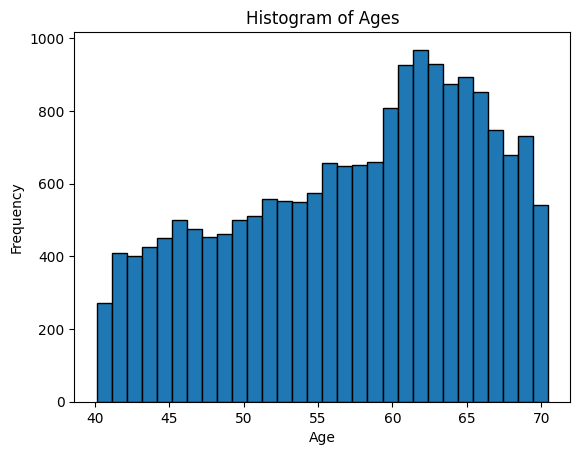

In [77]:
import matplotlib.pyplot as plt

plt.hist(Odata_train1_with_age.obs['age'], bins=30, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages')
plt.show()

In [80]:
def ageCluster(adata):
    Odata = adata.copy()

    # 定义年龄分段
    bins = [30, 40, 50, 60, 70, 80]
    labels = ['30-40','40-50', '50-60', '60-70','70-80']
    
    # 使用 cut 方法进行分类
    Odata.obs['Age_Group'] = pd.cut(Odata.obs['age'], bins=bins, labels=labels, right=False)

    # print(Odata.obs)

    age_group_counts = Odata.obs['Age_Group'].value_counts().sort_index()
    print(age_group_counts)

    return Odata

In [81]:
Odata_train1_with_age_cluster = ageCluster(Odata_train1_with_age)
Odata_train2_with_age_cluster = ageCluster(Odata_train2_with_age)

Odata_test_with_age_cluster = ageCluster(Odata_test_with_age)

Age_Group
30-40       0
40-50    4230
50-60    5990
60-70    8302
70-80     130
Name: count, dtype: int64
Age_Group
30-40       1
40-50    4254
50-60    6018
60-70    8269
70-80     110
Name: count, dtype: int64
Age_Group
30-40       0
40-50     951
50-60    1342
60-70    1829
70-80      23
Name: count, dtype: int64


In [82]:
Odata_train1_with_age_cluster.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB,Date_Attend,age,Age_Group
Id,,,,,,,,
1746734,0,1966,6,15,1966-06-15,2008-05-22,41.935661,40-50
5520940,0,1953,7,15,1953-07-15,2009-07-02,55.964408,50-60
1593358,0,1958,1,15,1958-01-15,2010-06-12,52.405202,50-60
5688129,1,1968,5,15,1968-05-15,2009-01-29,40.709103,40-50
3489761,0,1944,7,15,1944-07-15,2009-04-30,64.791239,60-70
...,...,...,...,...,...,...,...,...
5474998,0,1967,7,15,1967-07-15,2008-10-24,41.278576,40-50
4505014,1,1944,4,15,1944-04-15,2009-07-20,65.262149,60-70
4663692,0,1945,8,15,1945-08-15,2009-10-09,64.150582,60-70


In [83]:
Odata_test_with_age_cluster.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB,Date_Attend,age,Age_Group
Id,,,,,,,,
4292036,1,1939,2,15,1939-02-15,2008-12-01,69.793292,60-70
3215419,1,1966,7,15,1966-07-15,2007-11-15,41.336071,40-50
4792181,0,1941,6,15,1941-06-15,2008-08-14,67.164956,60-70
5495137,0,1960,2,15,1960-02-15,2007-12-04,47.800137,40-50
2360164,0,1949,9,15,1949-09-15,2009-05-01,59.624914,50-60
...,...,...,...,...,...,...,...,...
4031711,1,1944,12,15,1944-12-15,2008-09-09,63.734428,60-70
2234495,1,1961,4,15,1961-04-15,2010-06-23,49.188227,40-50
1566277,1,1968,12,15,1968-12-15,2009-07-29,40.618754,40-50


### Save data

In [85]:
Odata_train1_with_age_cluster.write("../../data/split_data_for_re_train/3-OLINK_data_train_withOutlier_part1.h5ad")
Odata_train2_with_age_cluster.write("../../data/split_data_for_re_train/3-OLINK_data_train_withOutlier_part2.h5ad")

Odata_test_with_age_cluster.write("../../data/split_data_for_re_train/3-OLINK_data_test_withOutlier_all.h5ad")